<a href="https://colab.research.google.com/github/RishabhChopra223/Sorting_Visualizer/blob/main/Final_internet_firewall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd  # Importing dataset for data manipulation and analysis

import matplotlib.pyplot as plt  # for data visualization

import numpy as np # for data encoding

import seaborn as sns  # for statistical data visualization

from sklearn.preprocessing import LabelEncoder  # for converting categorical data into numerical data

from sklearn.metrics import confusion_matrix  # for evaluating classification models

from sklearn.model_selection import train_test_split  # for splitting data into training and testing sets

from sklearn.tree import DecisionTreeClassifier  # decision tree models

from sklearn.model_selection import cross_validate  # for cross-validation of models

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score  # various metrics for evaluating classification models

from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier

from sklearn.neighbors import KNeighborsClassifier  # k-nearest neighbors classifier

from sklearn.model_selection import GridSearchCV  # hyperparameter tuning using grid search

from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelBinarizer

In [14]:
# Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Semester VI/DM/Project/internet_firewall_dataset.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [15]:
#Renaming of Columns

df = df.rename(columns={'Source Port': 'SourcePort','Destination Port':'DestinationPort','NAT Source Port':'NatSourcePort',
                        'NAT Destination Port':'NatDestinationPort','Bytes Sent':'BytesSent','Bytes Received':'BytesReceived',
                        'Elapsed Time (sec)':'ElapsedTime'})
df.head()

,SourcePort,DestinationPort,NatSourcePort,NatDestinationPort,Action,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime,pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


# Brief Description of Attributes

**Source Port:** The port number used by the sender/source device for communication.


**Destination Port:** The port number used by the receiver/destination device for communication.


**NAT Source Port:** Network Address Translation (NAT) modified source port number.


**NAT Destination Port:** NAT modified destination port number.


**Action(TARGET VARIABLE):** The action taken by the network device (e.g., Allow, Drop, Deny and Reset-Both) for the corresponding traffic flow.


**Bytes:** Total number of bytes transferred in the traffic flow.


**Bytes Sent:** Number of bytes sent in the traffic flow.


**Bytes Received:** Number of bytes received in the traffic flow.


**Packets:** Total number of packets exchanged in the traffic flow.


**Elapsed Time (sec):** Time elapsed during the traffic flow in seconds.


**pkts_sent:** Number of packets sent in the traffic flow.


**pkts_received:** Number of packets received in the traffic flow.



# Pie Chart for Action Attribute

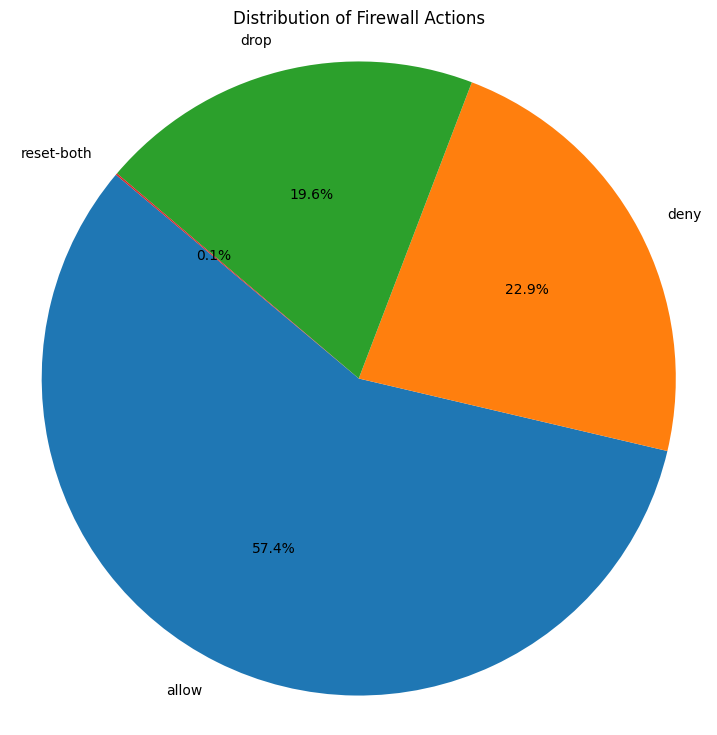

In [16]:
# Aggregate data to get counts of different actions
action_counts = df['Action'].value_counts()

# Create a pie chart
plt.figure(figsize=(9, 9))
plt.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Firewall Actions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [17]:
# moving the target variable ie,"Action" to end of datset.
col2 = df.pop("Action")
df.insert(len(df.columns), "Action", col2)
df.head()

,SourcePort,DestinationPort,NatSourcePort,NatDestinationPort,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime,pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [18]:
df.shape #shape of dataset i.e. number of rows and columns

(65532, 12)

In [19]:
df.Action.describe() # generate descriptive statistics of the data with label "Action"

count     65532
unique        4
top       allow
freq      37640
Name: Action, dtype: object

In [20]:
#function gives unique values for all features
df.nunique()

SourcePort            22724
DestinationPort        3273
NatSourcePort         29152
NatDestinationPort     2533
Bytes                 10724
BytesSent              6683
BytesReceived          8814
Packets                1116
ElapsedTime             915
pkts_sent               749
pkts_received           922
Action                    4
dtype: int64

In [24]:
#Data Preprocessing
#label encoding(categorical to numerical)

le = LabelEncoder()
df["SourcePort"] = le.fit_transform(df.SourcePort)
df["DestinationPort"] = le.fit_transform(df.DestinationPort)
df["NatSourcePort"] = le.fit_transform(df.NatSourcePort)
df["NatDestinationPort"] = le.fit_transform(df.NatDestinationPort)
df["Action"] = le.fit_transform(df.Action)

#Binarization of Action Variable
lb = LabelBinarizer()
df["Action"]= lb.fit_transform(df.Action)
df

,SourcePort,DestinationPort,NatSourcePort,NatDestinationPort,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime,pkts_sent,pkts_received,Action
0,15780,10,23985,9,177,94,83,2,30,1,1,1
1,14847,183,24834,121,4768,1600,3168,19,17,10,9,1
2,636,2577,18749,1999,238,118,120,2,1199,1,1,1
3,9697,183,22038,121,3327,1438,1889,15,17,8,7,1
4,9166,26,19876,16,25358,6778,18580,31,16,13,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,21002,15,5390,11,314,192,122,6,15,4,2,1
65528,10093,15,5499,11,4680740,67312,4613428,4675,77,985,3690,1
65529,13542,28,0,0,70,70,0,1,0,1,0,0
65530,13541,28,0,0,70,70,0,1,0,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SourcePort          65532 non-null  int64
 1   DestinationPort     65532 non-null  int64
 2   NatSourcePort       65532 non-null  int64
 3   NatDestinationPort  65532 non-null  int64
 4   Bytes               65532 non-null  int64
 5   BytesSent           65532 non-null  int64
 6   BytesReceived       65532 non-null  int64
 7   Packets             65532 non-null  int64
 8   ElapsedTime         65532 non-null  int64
 9   pkts_sent           65532 non-null  int64
 10  pkts_received       65532 non-null  int64
 11  Action              65532 non-null  int64
dtypes: int64(12)
memory usage: 6.0 MB


In [27]:
df.Action.value_counts () # displays count of values for each value of target variable "Class"

Action
1    37640
0    27892
Name: count, dtype: int64

In [28]:
df.describe()

,SourcePort,DestinationPort,NatSourcePort,NatDestinationPort,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime,pkts_sent,pkts_received,Action
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000,65532.000000
mean,12179.008942,527.421123,8317.572087,101.227492,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505,0.574376
std,6272.177024,926.192064,9660.348036,372.954743,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271,0.494441
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,0.000000
25%,8350.000000,15.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,0.000000
50%,12616.500000,28.000000,3435.500000,9.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000,1.000000
75%,16951.000000,676.000000,16501.250000,16.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000,1.000000
max,22723.000000,3272.000000,29151.000000,2532.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000,1.000000


In [29]:
df.isnull().sum()

SourcePort            0
DestinationPort       0
NatSourcePort         0
NatDestinationPort    0
Bytes                 0
BytesSent             0
BytesReceived         0
Packets               0
ElapsedTime           0
pkts_sent             0
pkts_received         0
Action                0
dtype: int64

<Figure size 3000x2000 with 0 Axes>

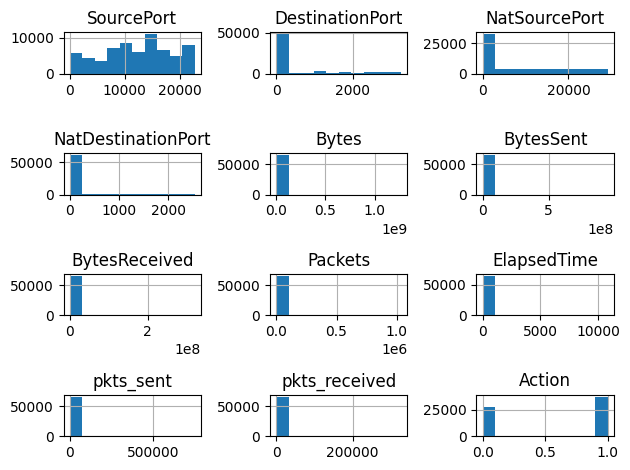

In [30]:
# Plot histograms of numerical columns
plt.figure(figsize=(30,20))
df.hist()
plt.tight_layout()
plt.show()

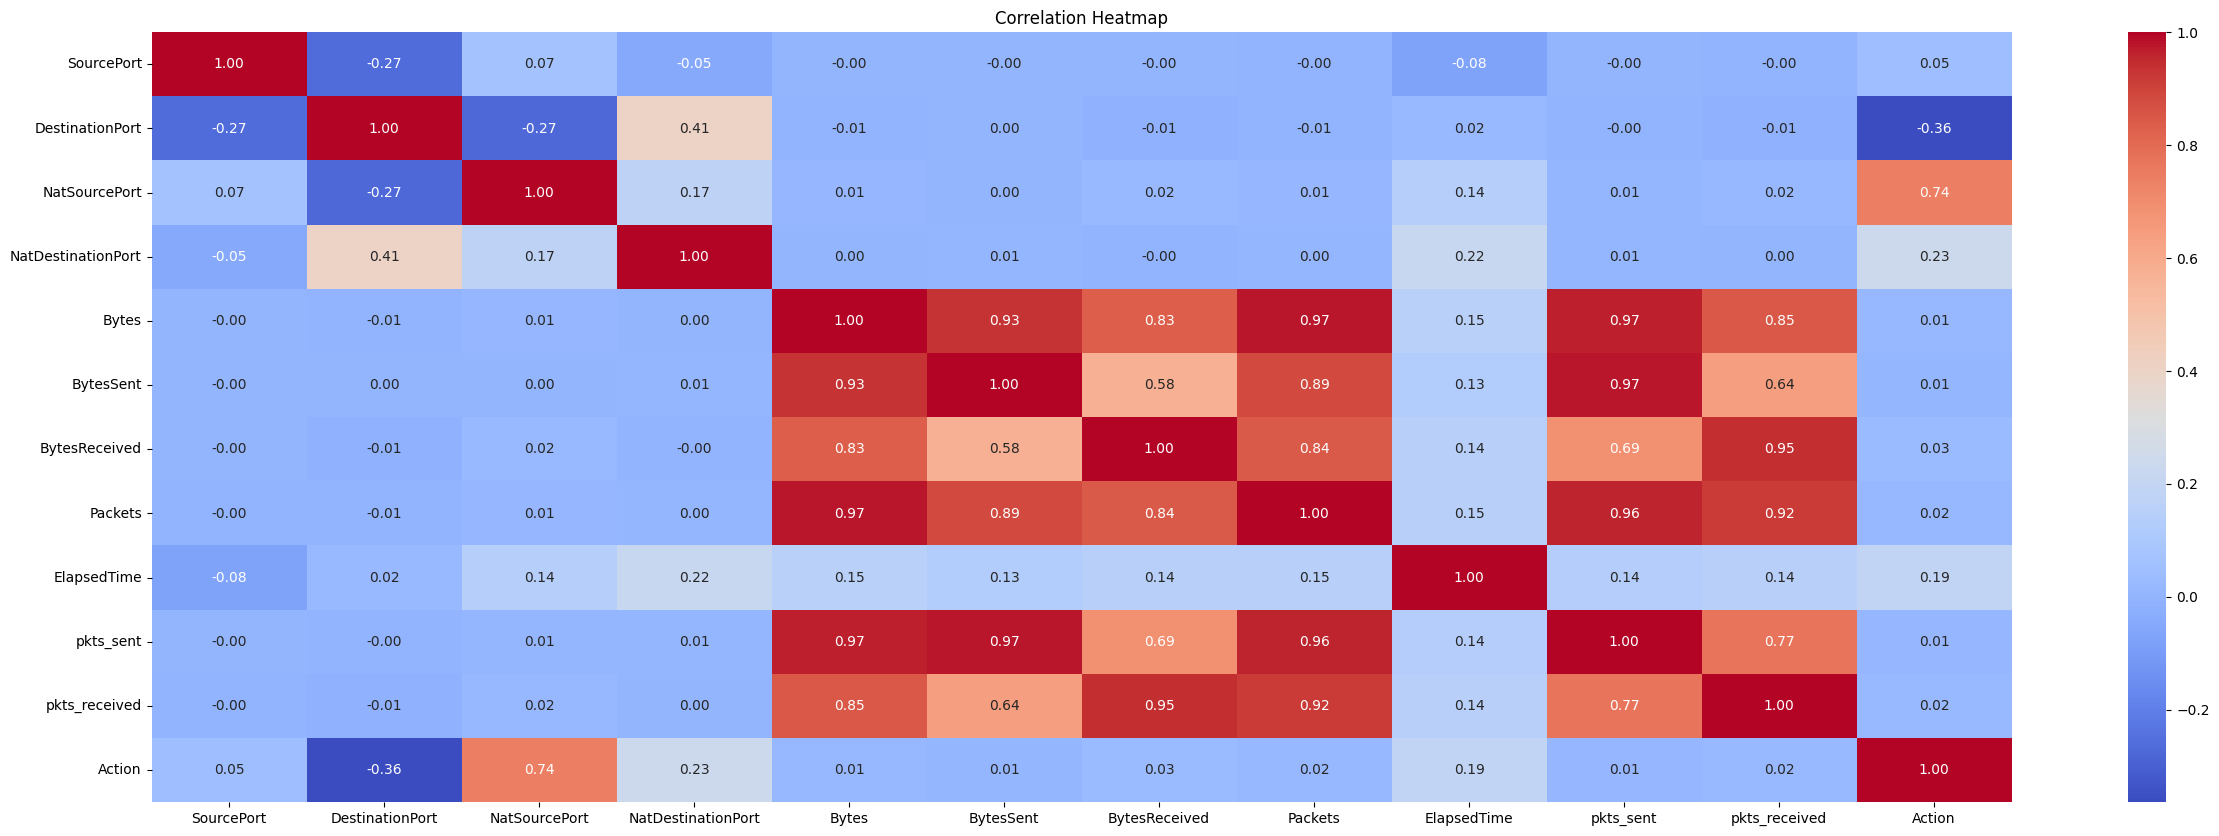

In [31]:
# Plot correlation heatmap of numerical columns
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

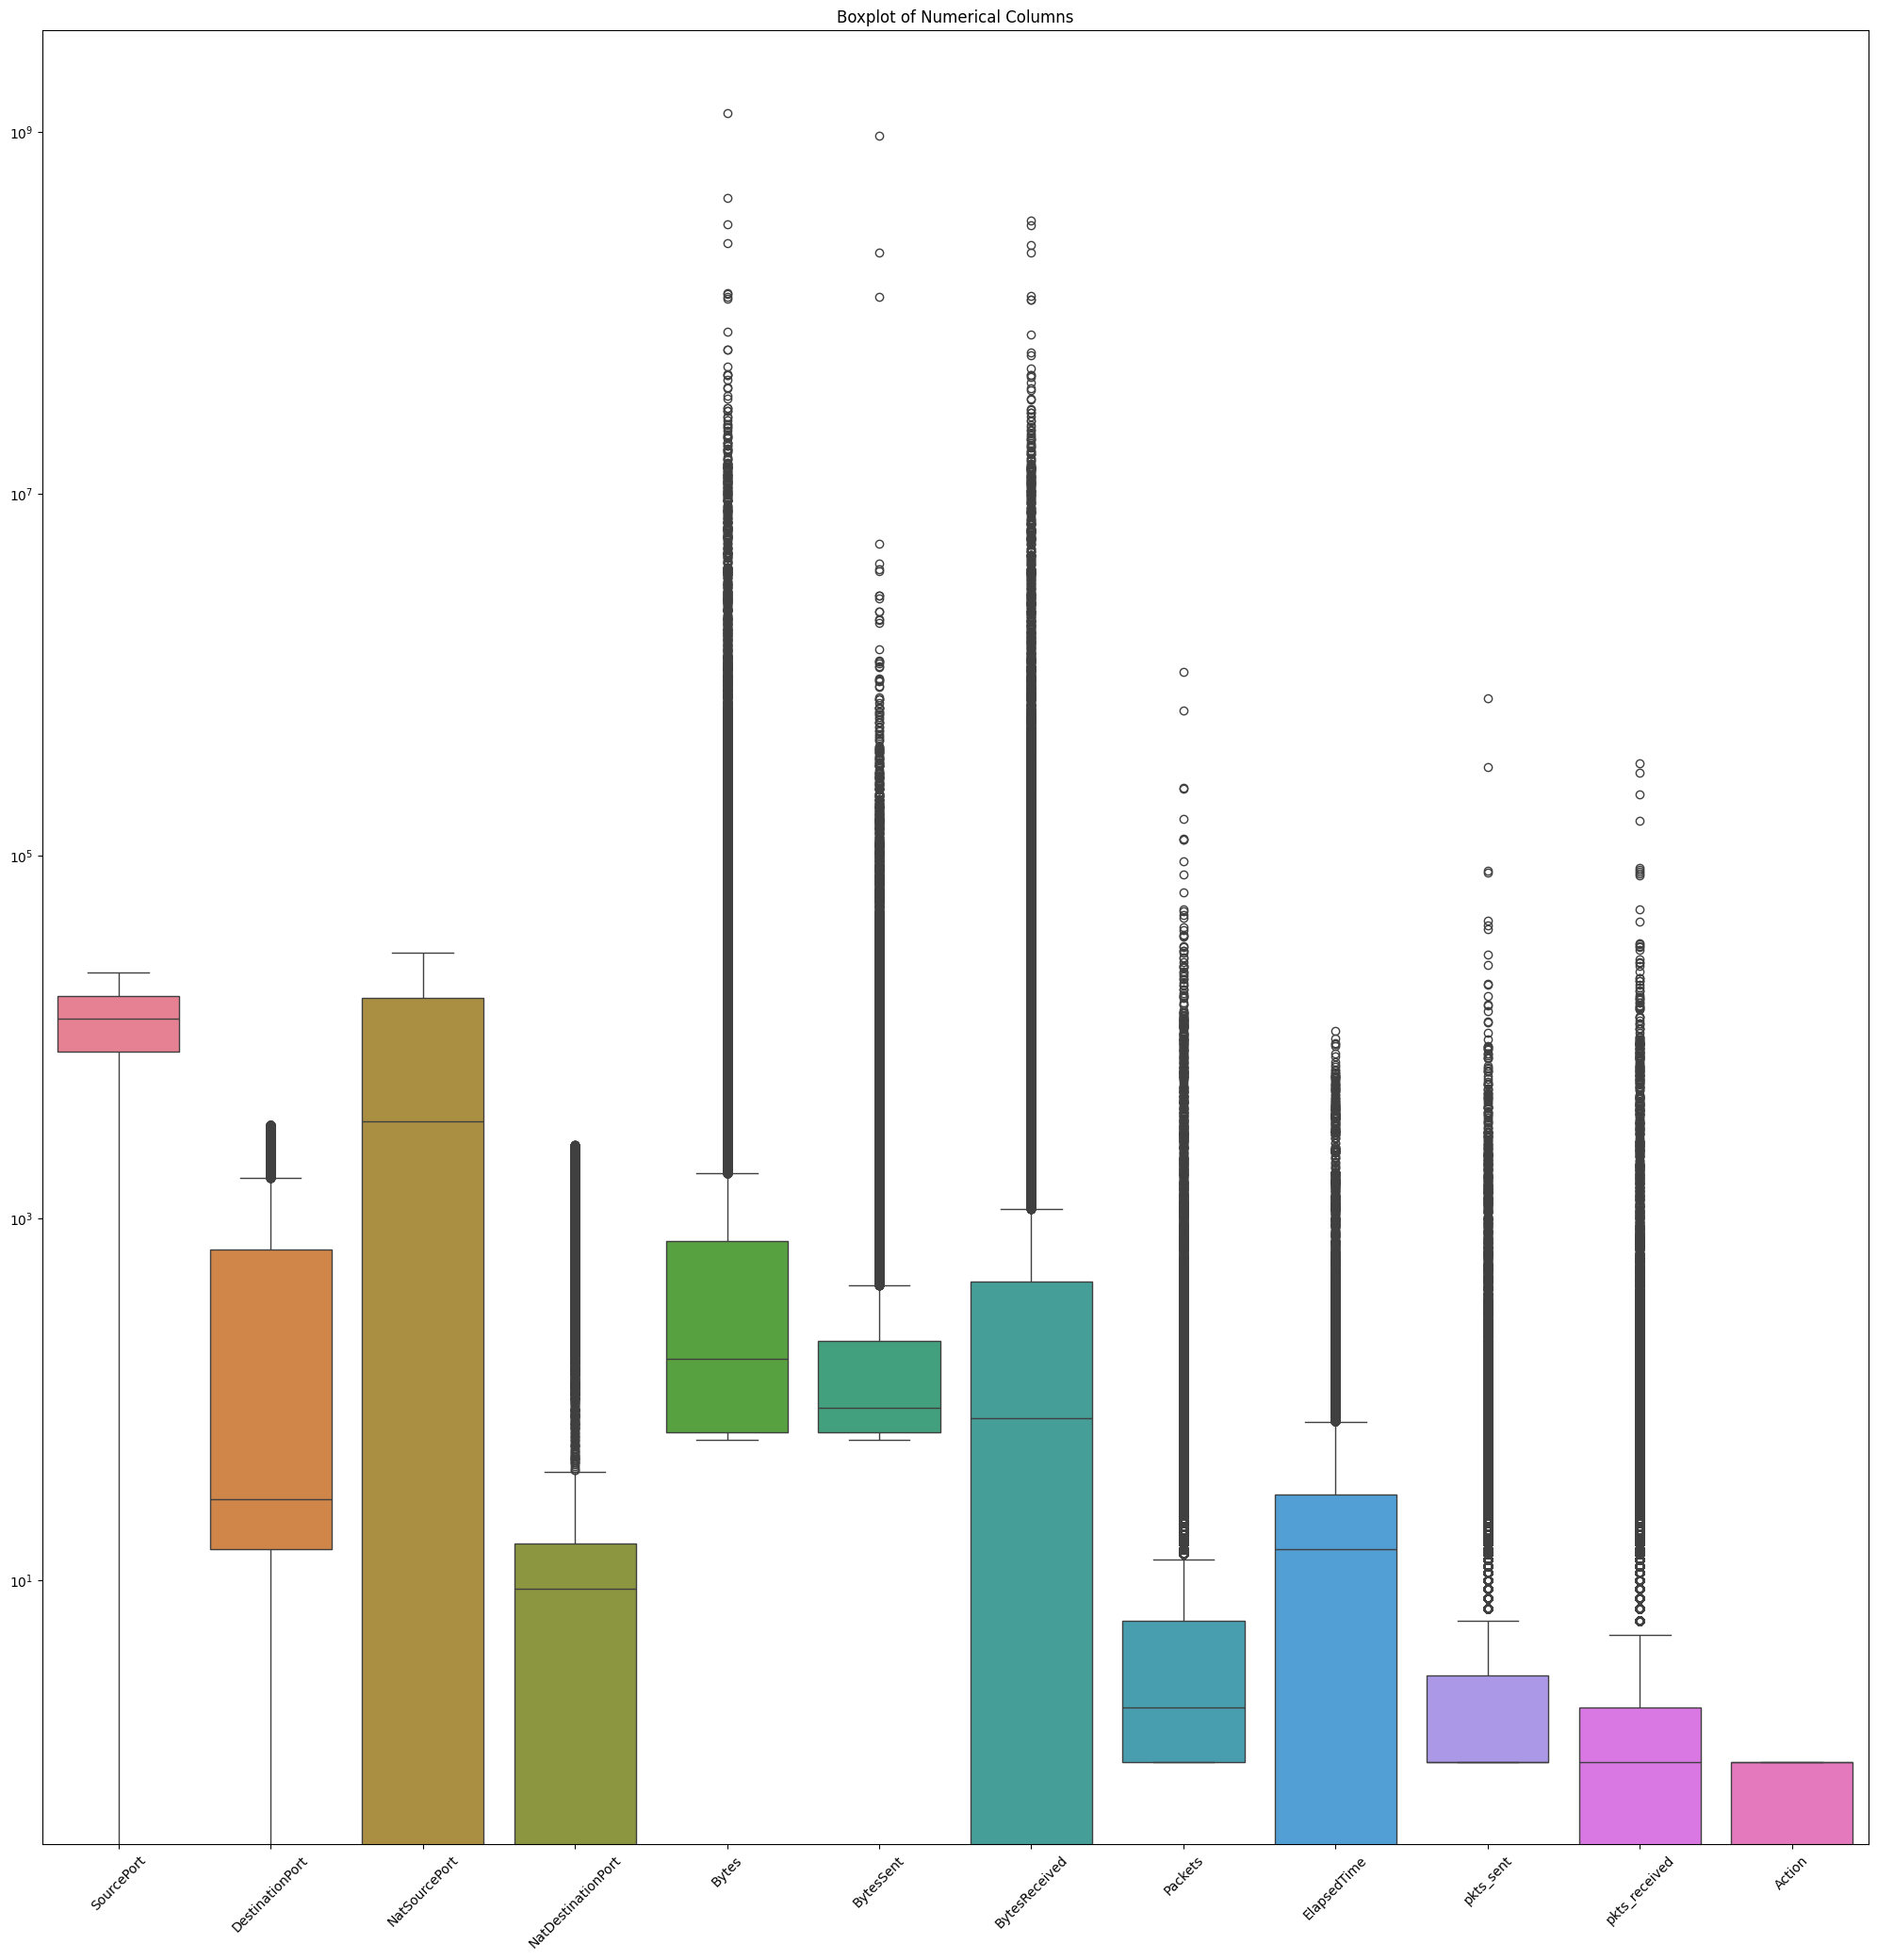

In [32]:
# Plot boxplots of numerical columns
plt.figure(figsize=(25,25))
sns.boxplot(data=df)
plt.yscale('log')  # Set y-axis to log scale
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

#specificity Function and Data Splitting

In [33]:
#Function for Specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

In [34]:
#splitting dataset (Features) into x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
#Splitting the dataset into Test Set(25%) and Training Set(75%)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

#Decision Tree Classifier

In [36]:
dtc = DecisionTreeClassifier()
cv_ans_dtc = cross_validate(dtc, x_train, y_train,cv=5)
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)

In [37]:
dtc.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 8.32925845e-05, 0.00000000e+00,
       9.13912294e-05, 1.28834261e-03, 8.29465920e-05, 2.09988429e-02,
       9.77382300e-01, 7.28845054e-05, 0.00000000e+00])

Accuracy:  0.999816883354697
F1 Score:  0.9998400085328781
Recall:  0.9996800682521062
Precision Score 1.0
Specificity:  1.0
Confusion Matrix:


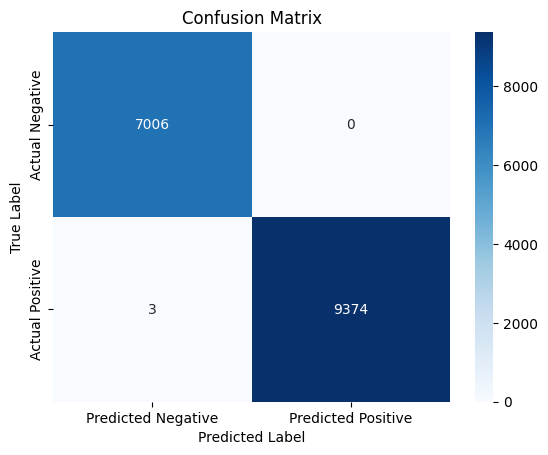

In [38]:
print("Accuracy: ", accuracy_score(y_test, y_pred_dtc))
print("F1 Score: ", f1_score(y_test, y_pred_dtc))
print("Recall: ", recall_score(y_test, y_pred_dtc))
print("Precision Score", precision_score(y_test, y_pred_dtc))
print("Specificity: ", specificity_score(y_test, y_pred_dtc))

cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print("Confusion Matrix:")
sns.heatmap(cm_dtc, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Gaussian Naive Bayes classifier


In [39]:
gnb = GaussianNB()
y_pred_NB = gnb.fit(x_train, y_train).predict(x_test)

Accuracy:  0.9386559238234755
F1 Score:  0.9434153482348968
Recall:  0.8934627279513704
Precision Score 0.9992843511450382
Specificity:  0.9991435912075364
Confusion Matrix:


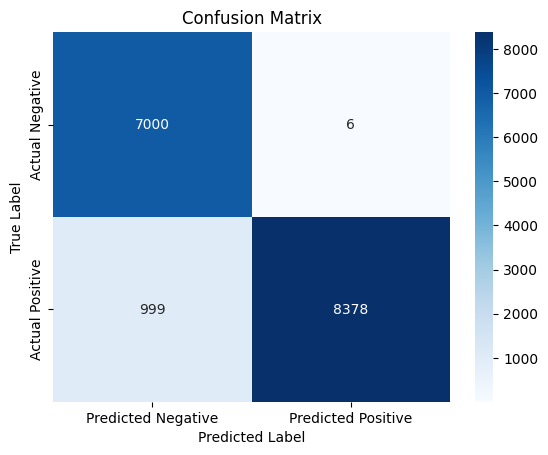

In [40]:
print("Accuracy: ", accuracy_score(y_test, y_pred_NB))
print("F1 Score: ", f1_score(y_test, y_pred_NB))
print("Recall: ", recall_score(y_test, y_pred_NB))
print("Precision Score", precision_score(y_test, y_pred_NB))
print("Specificity: ", specificity_score(y_test, y_pred_NB))


cm_NB = confusion_matrix(y_test, y_pred_NB)
print("Confusion Matrix:")
sns.heatmap(cm_NB, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#k-Nearest Neighbors Classifier

In [41]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 23)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

Best k value: 1


In [42]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

Accuracy:  0.9962766282121711
F1 Score:  0.9967391885390496
Recall:  0.9942412285379119
Precision Score 0.9992497320471597
Specificity:  0.9990008564087924
Confusion Matrix:


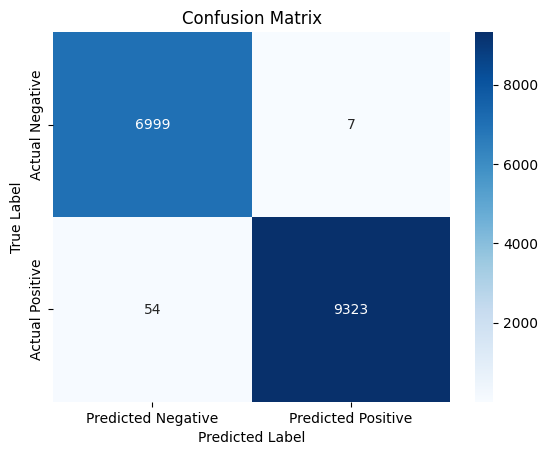

In [43]:
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("Precision Score", precision_score(y_test, y_pred_knn))
print("Specificity: ", specificity_score(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()